In [1]:
from numerapi import NumerAPI, utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

napi = NumerAPI()

In [2]:
# set your parameters here

model1 = 'nyuton_test6'
model2 = 'nyuton_test4'

starting_round = 314
end_round = 335

corr_multiplier = 1
tc_multiplier = 2

In [3]:
def getModelPerformance(model):
    model = napi.round_model_performances(model)
    m = pd.DataFrame(model)
    m = m[(m.roundNumber>=starting_round) & (m.roundNumber<=end_round)]
    m = m.dropna(subset=['tc'])
    m['result'] = m['corr'] * corr_multiplier + m['tc'] * tc_multiplier
    
    return m

m1 = getModelPerformance(model1)
m2 = getModelPerformance(model2)

In [4]:
er1, es1 = m1.result.mean(), m1.result.std()
er2, es2 = m2.result.mean(), m2.result.std()
cr = np.corrcoef(m1.result, m2.result)[0,1]

print(f'{model1} mean result (CORR+TC): {er1:.04f}, STD: {es1:.04f}')
print(f'{model2} mean result (CORR+TC): {er2:.04f}, STD: {es2:.04f}')
print(f'Correlation of results: {cr:.04f}')

nyuton_test6 mean result (CORR+TC): 0.0861, STD: 0.1059
nyuton_test4 mean result (CORR+TC): 0.0893, STD: 0.1006
Correlation of results: 0.5478


In [5]:
result = []
for w1 in np.arange(0, 1.1, 0.1):

    w2 = 1 - w1
    pr = w1 * er1 + w2 * er2
    ps = np.sqrt(w1**2 * es1**2 + w2**2 * es2**2 + 2*w1*w2*es1*es2*cr)

    result.append((w1, w2, pr, ps, pr/ps))
    
result = pd.DataFrame(result, columns=['Weight 1', 'Weight 2', 'Portfolio Return', 'Portfolio STD', 'Portfolio Sharpe'])
result

,Weight 1,Weight 2,Portfolio Return,Portfolio STD,Portfolio Sharpe
0,0.0,1.0,0.089299,0.100609,0.887582
1,0.1,0.9,0.088975,0.096758,0.919567
2,0.2,0.8,0.088652,0.093783,0.945284
3,0.3,0.7,0.088328,0.091771,0.962490
4,0.4,0.6,0.088005,0.090784,0.969389
5,0.5,0.5,0.087682,0.090857,0.965054
6,0.6,0.4,0.087358,0.091986,0.949689
7,0.7,0.3,0.087035,0.094134,0.924581
8,0.8,0.2,0.086711,0.097234,0.891782
9,0.9,0.1,0.086388,0.101197,0.853659


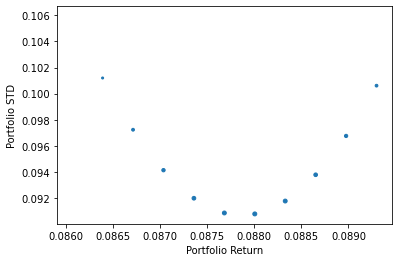

In [6]:
plt.xlabel('Portfolio Return')
plt.ylabel('Portfolio STD')
plt.scatter(result['Portfolio Return'], result['Portfolio STD'], s=(result['Portfolio Sharpe']-result['Portfolio Sharpe'].min())*100)